In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib.pyplot
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn

You should consider upgrading via the 'c:\users\hanna\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the 'c:\users\hanna\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hanna\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/hanna/OneDrive/Desktop/Datasets/marketing.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# clean data 
# combine columns to reduce dimension
df = df.dropna(how='any',axis=0)
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Age']= 2021 - df['Year_Birth']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df = df[['Age','Education','Marital_Status','Children','Dt_Customer','Income','Spending','TotalAcceptedCmp',
             'NumTotalPurchases','Recency','Complain']]
# split marital status to single or married, combine education into undergrad, grad, postgrad
df = df.replace(['Divorced', 'Alone', 'Widow', 'Absurd','YOLO','single'], 'Single')
df = df.replace(['Together'],'Married')
df["Education"]=df["Education"].replace({"Basic":"Undergrad","2n Cycle":"Undergrad",
                                         "Graduation":"Grad", "Master":"Postgrad", "PhD":"Postgrad"})

In [6]:
df.isnull().sum()

Age                  0
Education            0
Marital_Status       0
Children             0
Dt_Customer          0
Income               0
Spending             0
TotalAcceptedCmp     0
NumTotalPurchases    0
Recency              0
Complain             0
dtype: int64

In [7]:
# get rid of outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "Age")
print("Upper Age: ", upper)
print("Lower Age: ", lower)

upper1, lower1 = outliers(df, "Income")
print("Upper Income: ", upper1)
print("Lower Income: ", lower1)

Upper Age:  89.0
Lower Age:  17.0
Upper Income:  118350.5
Lower Income:  -14525.5


In [8]:
df = df[(df['Age'] < upper) & (df['Income'] < upper1)]

<AxesSubplot:>

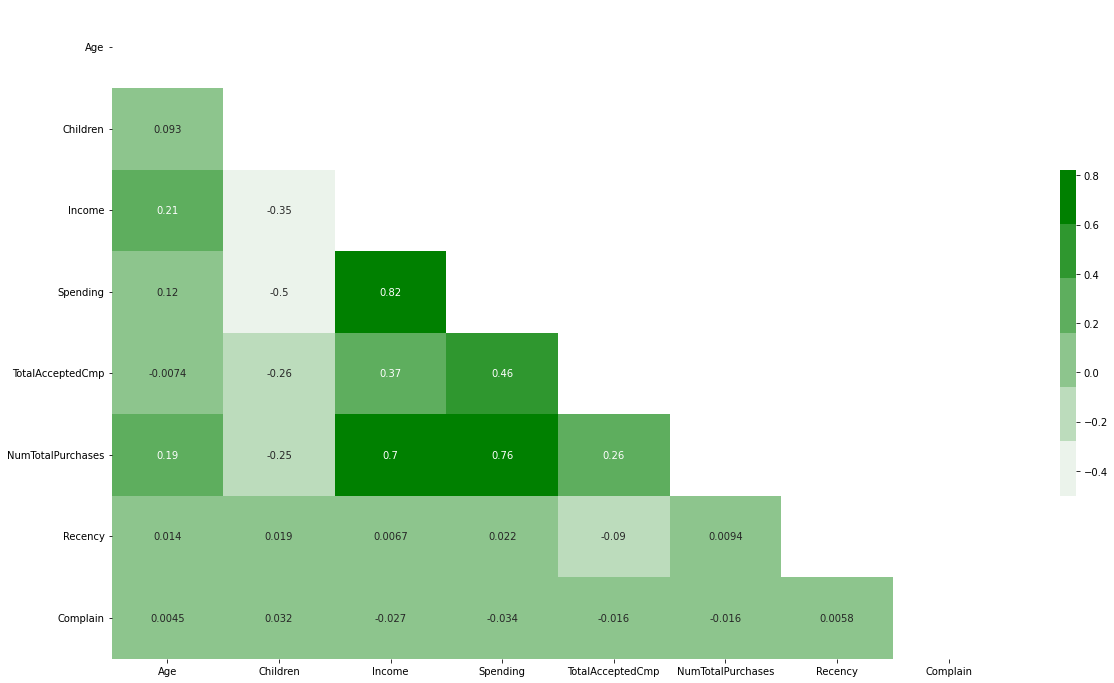

In [9]:
df_data = df.copy
# Calculate pairwise-correlation
matrix = df.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.light_palette("green")
plt.figure(figsize=(20,12)) 
sns.heatmap(df.corr(),mask=mask,annot=True,cmap = cmap, cbar_kws={"shrink": .5})

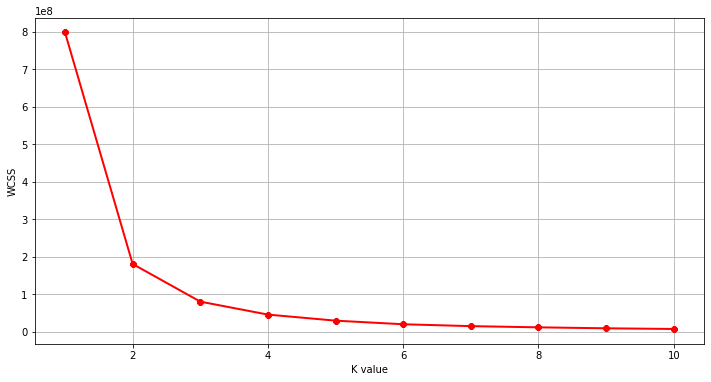

In [10]:
X1=df.loc[:, ["Age", "Spending"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X1)
print(label)

[0 1 2 ... 2 2 1]


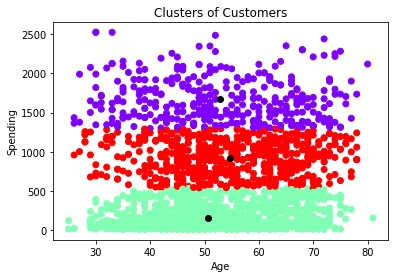

In [12]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.show()
# no relation

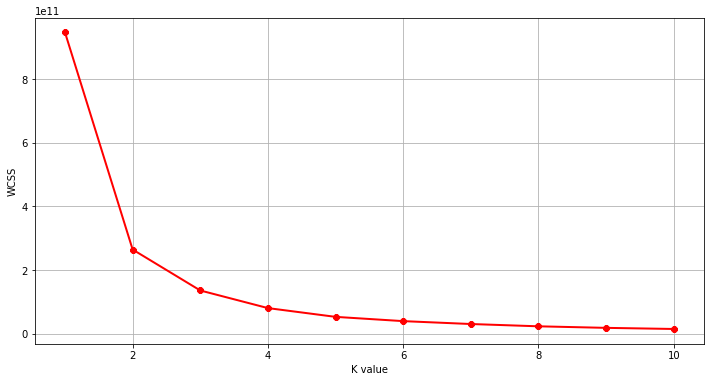

In [13]:
X2=df.loc[:, ["Income", "Spending"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X2)
print(label)

[0 0 2 ... 0 2 0]


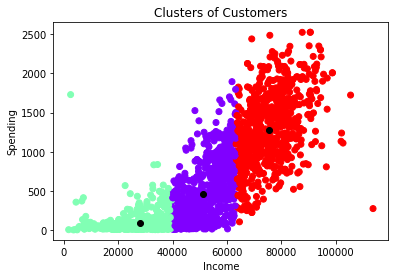

In [15]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

In [16]:
X3=df.loc[:, ["Income", "Spending", "Age"]].values

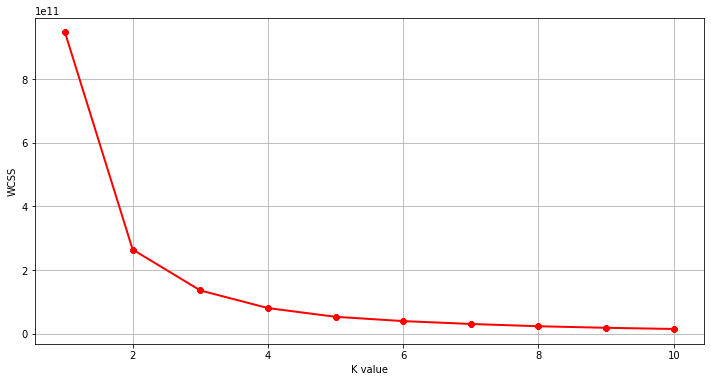

In [17]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

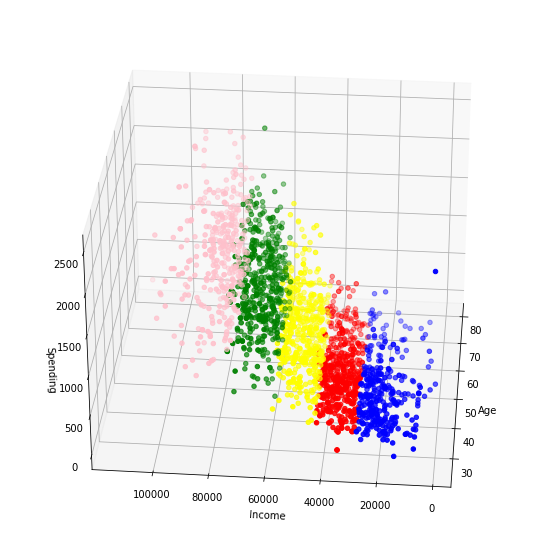

In [19]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"][df.label == 0], df["Income"][df.label == 0], df["Spending"][df.label == 0], c = "red")
ax.scatter(df["Age"][df.label == 1], df["Income"][df.label == 1], df["Spending"][df.label == 1], c = "green")
ax.scatter(df["Age"][df.label == 2], df["Income"][df.label == 2], df["Spending"][df.label == 2], c = "blue")
ax.scatter(df["Age"][df.label == 3], df["Income"][df.label == 3], df["Spending"][df.label == 3], c = "yellow")
ax.scatter(df["Age"][df.label == 4], df["Income"][df.label == 4], df["Spending"][df.label == 4], c = "pink")
ax.view_init(30,185)

plt.xlabel('Age')
plt.ylabel('Income')
ax.set_zlabel('Spending')
plt.show()